# **KERAKLI BARCHA KUTIBXONALARNI CHAQIRIB OLAMIZ:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score
from sklearn import metrics
from sklearn.cluster import KMeans

# **TRAIN.CSV NI O'QIB OLAMIZ VA BOSHLANG'ICH TAHLILNI BOSHLAYMIZ:**

In [ ]:
df = pd.read_csv('/content/train.csv (1).zip')
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D


In [ ]:
df.shape

(15000, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8494 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8502 non-null   object 
 6   Hepatomegaly   8492 non-null   object 
 7   Spiders        8491 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6701 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8399 non-null   float64
 13  Alk_Phos       8488 non-null   float64
 14  SGOT           8486 non-null   float64
 15  Tryglicerides  6666 non-null   float64
 16  Platelets      14436 non-null  float64
 17  Prothrombin    14984 non-null  float64
 18  Stage 

In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
N_Days,0
Drug,6506
Age,0
Sex,0
Ascites,6498
Hepatomegaly,6508
Spiders,6509
Edema,0
Bilirubin,0
Cholesterol,8299


In [ ]:
df['Drug'].value_counts()

,count
Drug,
D-penicillamine,4610
Placebo,3884


In [ ]:
df['Sex'].value_counts()

,count
Sex,
F,14392
M,608


In [ ]:
df['Ascites'].value_counts()

,count
Ascites,
N,8116
Y,386


In [ ]:
df['Hepatomegaly'].value_counts()

,count
Hepatomegaly,
N,4634
Y,3858


In [ ]:
df['Spiders'].value_counts()

,count
Spiders,
N,6769
Y,1722


In [ ]:
df['Edema'].value_counts()

,count
Edema,
N,13845
S,792
Y,363


In [ ]:
df['Status'].value_counts()

,count
Status,
C,10053
D,4565
CL,381
Y,1


In [ ]:
df = df[df['Status'] != 'Y']

# **ID USTUNI TASHLAB YUBORILDI, CHUNKI U MODELGA TASIR QILMAYDI. ENDI CATEGORICAL USTUNLARNI ENCODING QILAMIZ VA SIMPLEIMPUTER ORQALI NAN QIYMATLARDAN QUTULAMIZ. SO'NGRA TRAIN VA TESTLARGA AJRATAMIZ.**

In [ ]:
numerical_cols = ['N_Days','Age', 'Bilirubin', 'Cholesterol','Albumin','Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

In [ ]:
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']
encoder = LabelEncoder()
df['Drug'] = encoder.fit_transform(df['Drug'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Ascites'] = encoder.fit_transform(df['Ascites'])
df['Hepatomegaly'] = encoder.fit_transform(df['Hepatomegaly'])
df['Spiders'] = encoder.fit_transform(df['Spiders'])
df['Edema'] = encoder.fit_transform(df['Edema'])

In [ ]:
encoderrr = LabelEncoder()
df['Status'] = encoderrr.fit_transform(df['Status'])

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [ ]:
df.corrwith(df['Status']).sort_values(ascending=False)

,0
Status,1.000000
Prothrombin,0.458170
Bilirubin,0.430682
Stage,0.370943
Copper,0.311726
Edema,0.295667
SGOT,0.231944
Age,0.156821
Hepatomegaly,0.155156
Cholesterol,0.141075


In [ ]:
df['Status'].value_counts().sort_index()

,count
Status,
0,10053
1,381
2,4565


In [ ]:
x = df.drop(['Status'], axis=1)
y = df['Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **MODELLAR YARATAMIZ:**

Model aniqligi:  0.8483333333333334
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2004
           1       0.80      0.05      0.10        74
           2       0.81      0.73      0.77       922

    accuracy                           0.85      3000
   macro avg       0.82      0.57      0.59      3000
weighted avg       0.85      0.85      0.84      3000

[[1869    0  135]
 [  49    4   21]
 [ 249    1  672]]


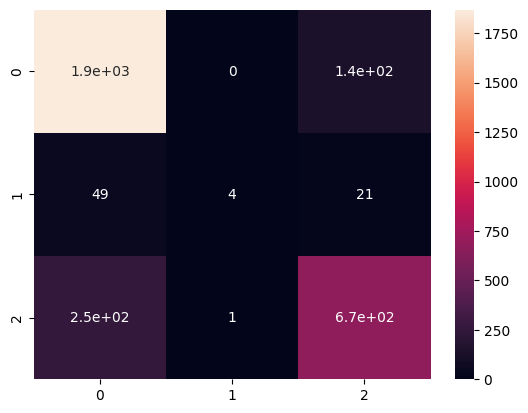

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

Model aniqligi:  0.7816666666666666
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2004
           1       0.17      0.19      0.18        74
           2       0.68      0.69      0.69       922

    accuracy                           0.78      3000
   macro avg       0.57      0.57      0.57      3000
weighted avg       0.78      0.78      0.78      3000

[[1695   39  270]
 [  33   14   27]
 [ 256   30  636]]


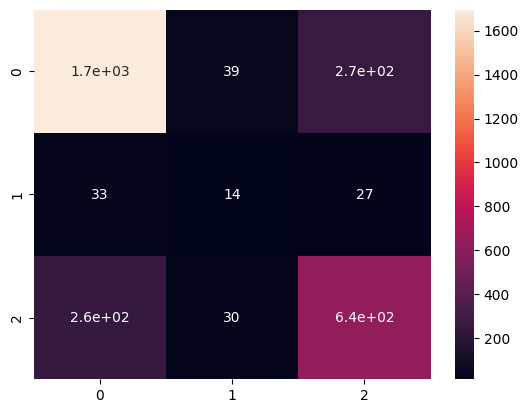

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

y_predict = tree_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

Model aniqligi:  0.8506666666666667
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2004
           1       0.55      0.16      0.25        74
           2       0.80      0.75      0.77       922

    accuracy                           0.85      3000
   macro avg       0.74      0.61      0.64      3000
weighted avg       0.84      0.85      0.84      3000

[[1852    4  148]
 [  41   12   21]
 [ 228    6  688]]


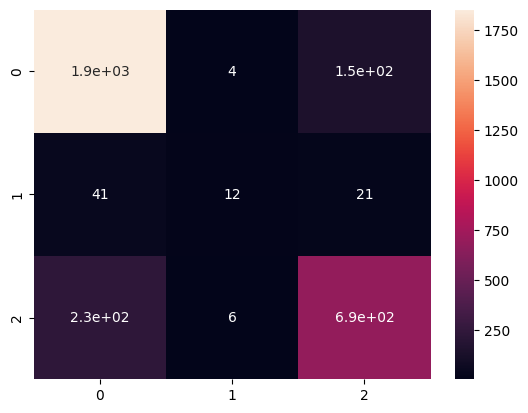

In [ ]:
xbg_model = XGBClassifier()
xbg_model.fit(x_train, y_train)

y_pre = xbg_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pre))
print(classification_report(y_test, y_pre))
print(confusion_matrix(y_test, y_pre))

sns.heatmap(confusion_matrix(y_test, y_pre), annot=True)
plt.show()

Model aniqligi:  0.8313333333333334
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2004
           1       0.14      0.01      0.02        74
           2       0.81      0.68      0.74       922

    accuracy                           0.83      3000
   macro avg       0.60      0.54      0.55      3000
weighted avg       0.81      0.83      0.82      3000

[[1869    3  132]
 [  57    1   16]
 [ 295    3  624]]


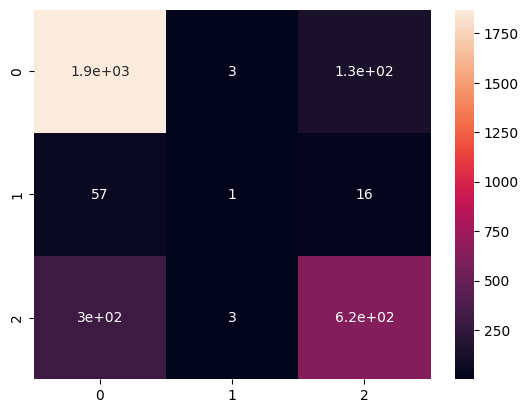

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

y_predicttt = lg_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_predicttt))
print(classification_report(y_test, y_predicttt))
print(confusion_matrix(y_test, y_predicttt))

sns.heatmap(confusion_matrix(y_test, y_predicttt), annot=True)
plt.show()

Model aniqligi:  0.8383333333333334
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2004
           1       0.00      0.00      0.00        74
           2       0.83      0.68      0.74       922

    accuracy                           0.84      3000
   macro avg       0.56      0.54      0.54      3000
weighted avg       0.82      0.84      0.82      3000

[[1892    0  112]
 [  57    0   17]
 [ 299    0  623]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


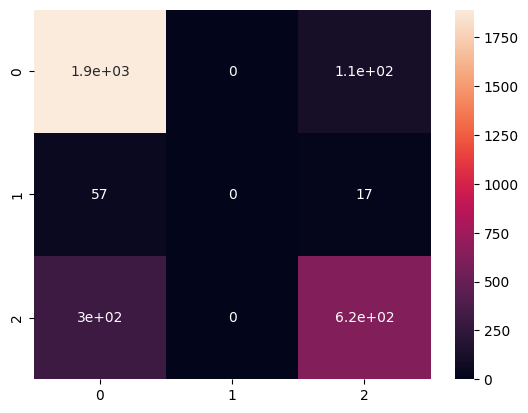

In [ ]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

y_p = svc_model.predict(x_test)

print("Model aniqligi: ", accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))
print(confusion_matrix(y_test, y_p))

sns.heatmap(confusion_matrix(y_test, y_p), annot=True)
plt.show()

# **5 TA MODEL ORQALI BASHORAT QILIB KO'RDIM, ENG YAXSHI NATIJA XBG BO'LDI. ACCURACY : 0,85 YA'NI 85 FOIZ. ENDI SHU MODELNI TEST DF GA CHURISH QOLDI XOLOS.**

In [ ]:
test_df = pd.read_csv('/content/test (1).csv')
test_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,22646.0,NaN,22646.0,F,NaN,NaN,NaN,N,1.4,NaN,3.34,NaN,NaN,NaN,NaN,190.0,11.0,4.0
1,15001,2149.0,NaN,18993.0,F,NaN,NaN,NaN,N,0.9,NaN,3.24,NaN,NaN,NaN,NaN,233.0,9.0,2.0
2,15002,3850.0,D-penicillamine,16050.0,M,N,N,N,N,1.0,460.0,3.64,75.0,2148.0,102.3,118.0,172.0,10.6,3.0
3,15003,2419.0,D-penicillamine,20354.0,F,N,N,N,N,0.6,258.0,3.96,31.0,642.0,70.0,83.0,336.0,10.8,2.0
4,15004,1086.0,NaN,23376.0,F,NaN,NaN,NaN,N,4.4,NaN,4.40,NaN,NaN,NaN,NaN,447.0,10.3,2.0


In [ ]:
idlarim = test_df['id']

In [ ]:
numerical_cols = ['N_Days','Age', 'Bilirubin', 'Cholesterol','Albumin','Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
num_imputer = SimpleImputer(strategy='mean')
test_df[numerical_cols] = num_imputer.fit_transform(test_df[numerical_cols])

In [ ]:
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
encoder = LabelEncoder()
test_df['Drug'] = encoder.fit_transform(test_df['Drug'])
test_df['Sex'] = encoder.fit_transform(test_df['Sex'])
test_df['Ascites'] = encoder.fit_transform(test_df['Ascites'])
test_df['Hepatomegaly'] = encoder.fit_transform(test_df['Hepatomegaly'])
test_df['Spiders'] = encoder.fit_transform(test_df['Spiders'])
test_df['Edema'] = encoder.fit_transform(test_df['Edema'])

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
test_df[categorical_cols] = cat_imputer.fit_transform(test_df[categorical_cols])

In [ ]:
test_df.isnull().sum()

,0
id,0
N_Days,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [ ]:
test_df = test_df.drop(['id'], axis=1)
scaled_test_df = scaler.transform(test_df)

In [ ]:
predict_array = xbg_model.predict_proba(scaled_test_df)
predict_array

array([[4.1085723e-01, 1.9770442e-03, 5.8716571e-01],
       [9.4282603e-01, 6.3595953e-03, 5.0814390e-02],
       [4.0971372e-01, 6.9877305e-03, 5.8329856e-01],
       ...,
       [9.0113413e-01, 5.3997734e-03, 9.3466118e-02],
       [9.9033797e-01, 3.5039928e-05, 9.6269650e-03],
       [6.4157850e-01, 1.8369745e-02, 3.4005174e-01]], dtype=float32)

In [ ]:
class_labels = encoderrr.inverse_transform(xbg_model.classes_)
class_labels

array(['C', 'CL', 'D'], dtype=object)

In [ ]:
final_df = pd.DataFrame(predict_array, columns=[f"Status_{label}" for label in class_labels])
final_df

,Status_C,Status_CL,Status_D
0,0.410857,0.001977,0.587166
1,0.942826,0.006360,0.050814
2,0.409714,0.006988,0.583299
3,0.992517,0.000104,0.007379
4,0.273860,0.176315,0.549826
...,...,...,...
9995,0.986045,0.000852,0.013103
9996,0.014951,0.004084,0.980965
9997,0.901134,0.005400,0.093466
9998,0.990338,0.000035,0.009627


In [ ]:
submission = pd.concat([idlarim.reset_index(drop=True), final_df], axis=1)
submission.head(10)

,id,Status_C,Status_CL,Status_D
0,15000,0.410857,0.001977,0.587166
1,15001,0.942826,0.006360,0.050814
2,15002,0.409714,0.006988,0.583299
3,15003,0.992517,0.000104,0.007379
4,15004,0.273860,0.176315,0.549826
5,15005,0.973009,0.000188,0.026803
6,15006,0.405771,0.001140,0.593088
7,15007,0.000966,0.000231,0.998803
8,15008,0.873701,0.001567,0.124732
9,15009,0.979007,0.004192,0.016801


In [ ]:
submission.to_csv('submission.csv', index=False)